In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Walmart\Dataset\walmart_data.csv")

# EDA

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [60]:
cat_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category']

In [61]:
for col in cat_columns:
    print(col + ": " + str(np.sort(df[col].unique())))

Gender: ['F' 'M']
Age: ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category: ['A' 'B' 'C']
Stay_In_Current_City_Years: ['0' '1' '2' '3' '4+']
Marital_Status: [0 1]
Occupation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## Univariate Analysis

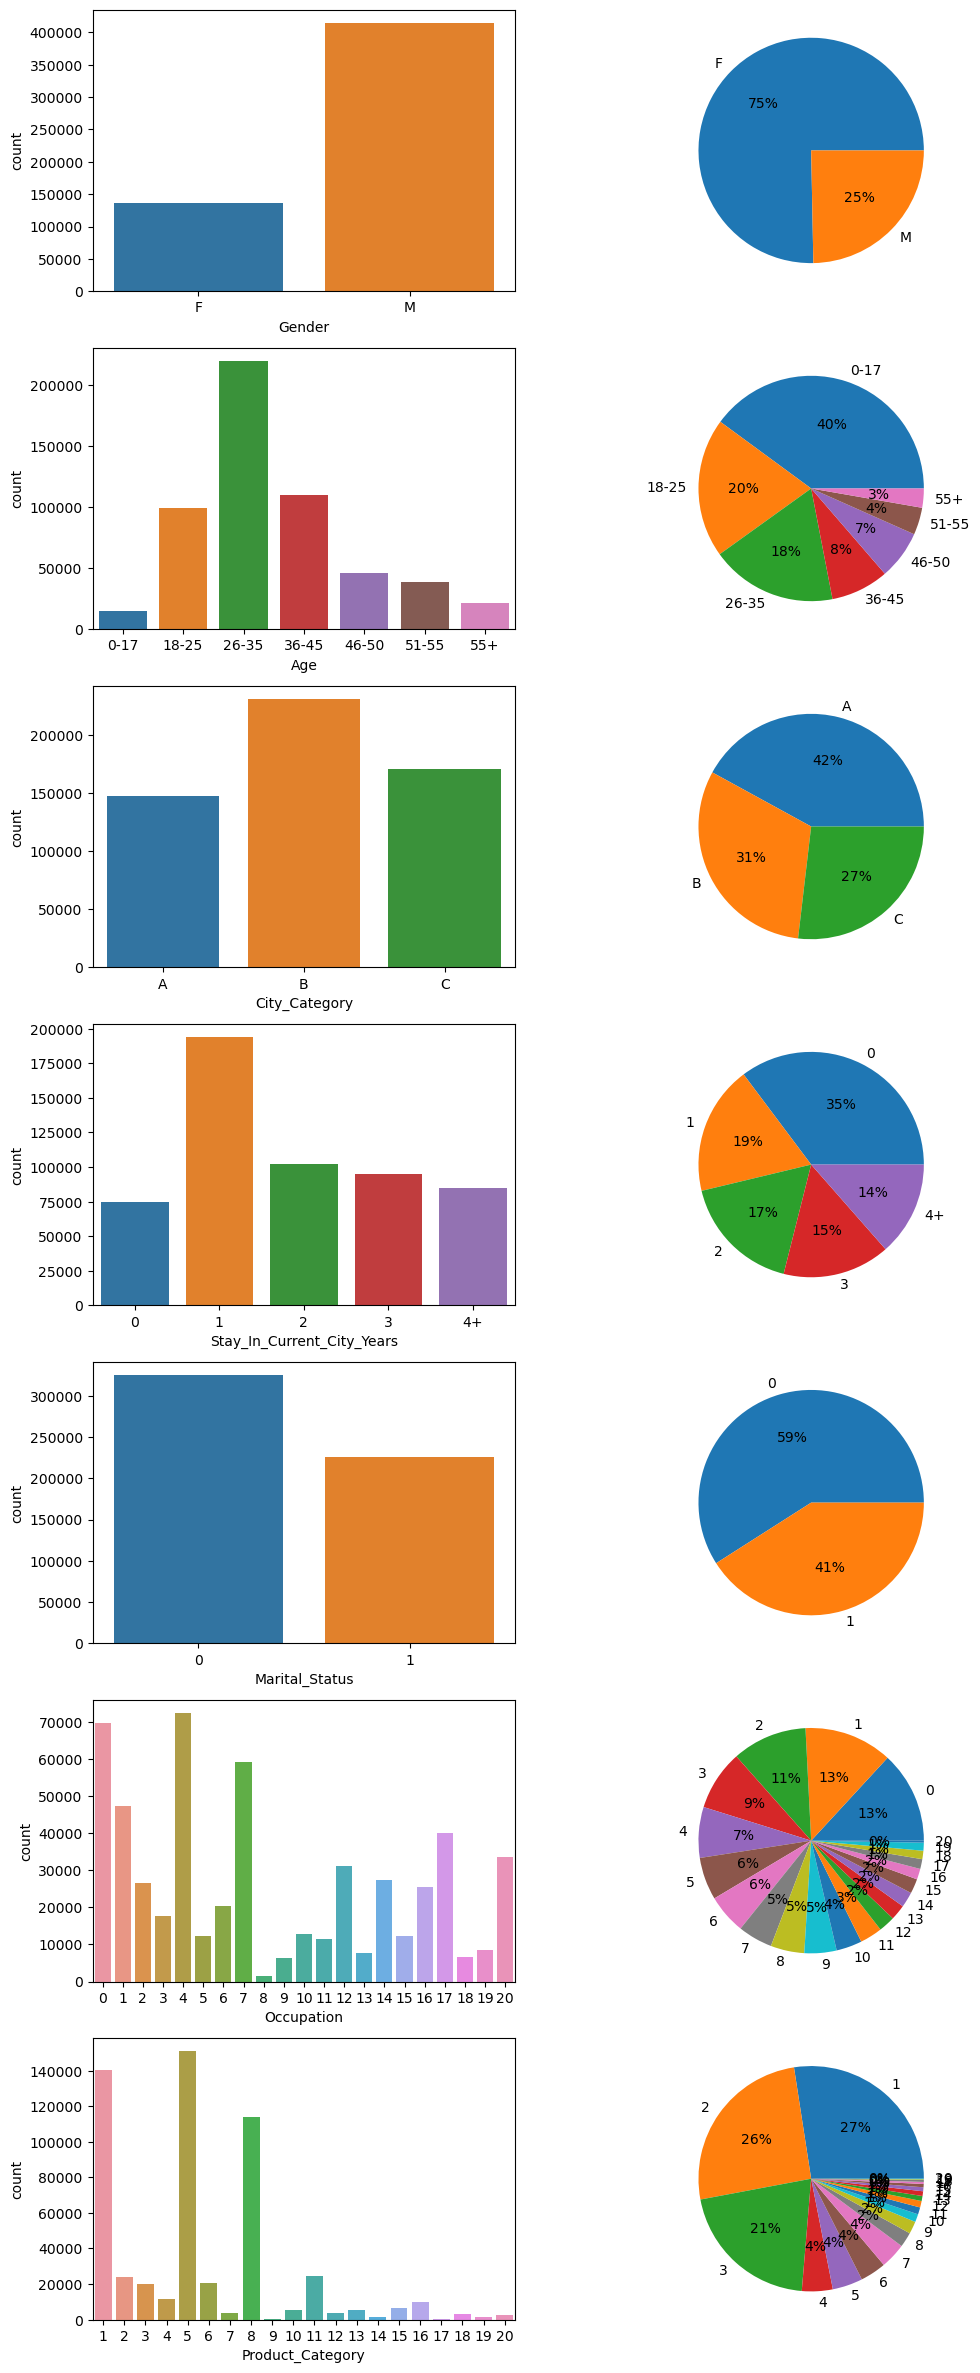

In [63]:
plt.figure(figsize=(12,30))
cnt = 1
for col in cat_columns:
    plt.subplot(len(cat_columns),2,cnt)
    sns.countplot(x = col, data = df, order = list(np.sort(df[col].value_counts().index)))
    cnt += 1
    plt.subplot(len(cat_columns),2,cnt)
    plt.pie(x = df[col].value_counts(), labels = list(np.sort(df[col].value_counts().index)), autopct = '%.0f%%')
    cnt += 1

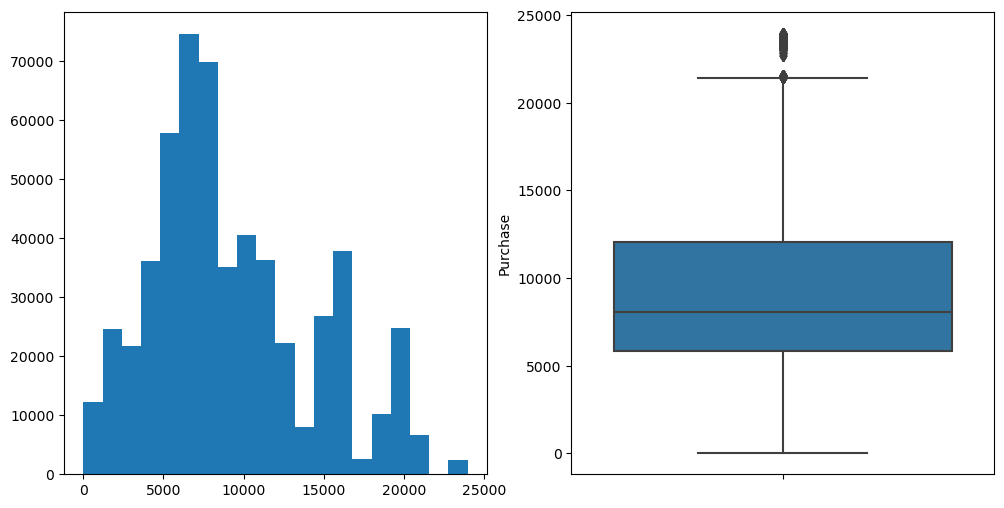

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['Purchase'], bins= 20)
plt.subplot(1,2,2)
sns.boxplot(y = 'Purchase', data = df)
plt.show()

## Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

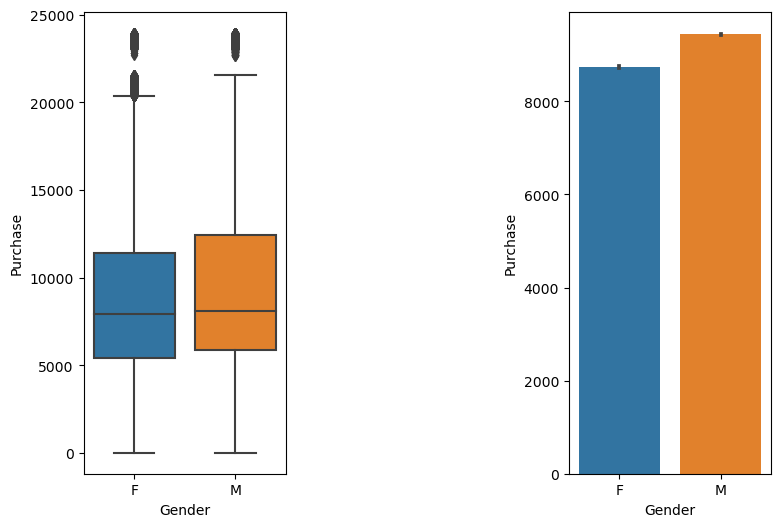

In [110]:
# Purchase Vs Gender
plt.figure(figsize=(12,6))
plt.subplot(1,4,2)
sns.boxplot(y = 'Purchase', data = df, x = 'Gender')
plt.subplot(1,4,3)
sns.barplot(data=df, x = 'Gender', y = 'Purchase', estimator='mean')
plt.show()

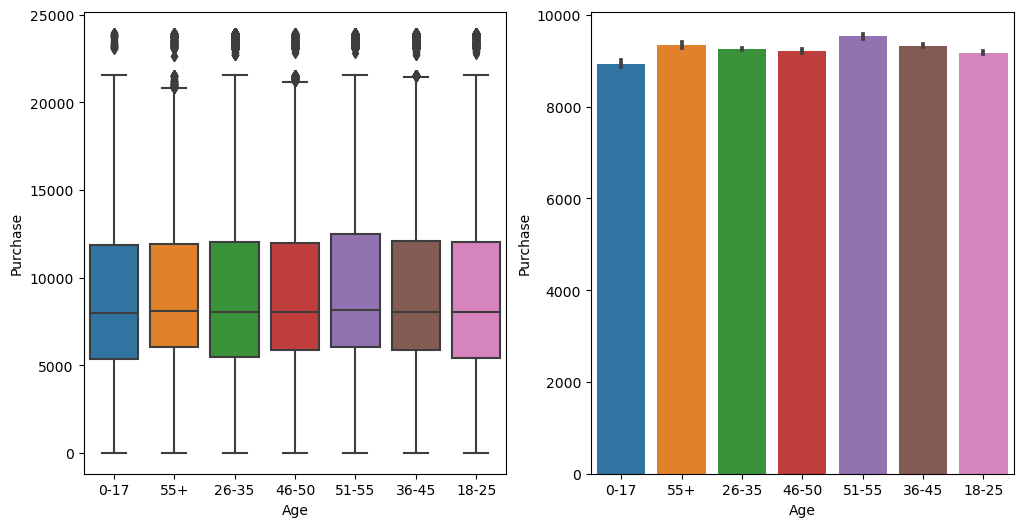

In [113]:
# Purchase Vs Age
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Age')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'Age', y = 'Purchase', estimator='mean')
plt.show()

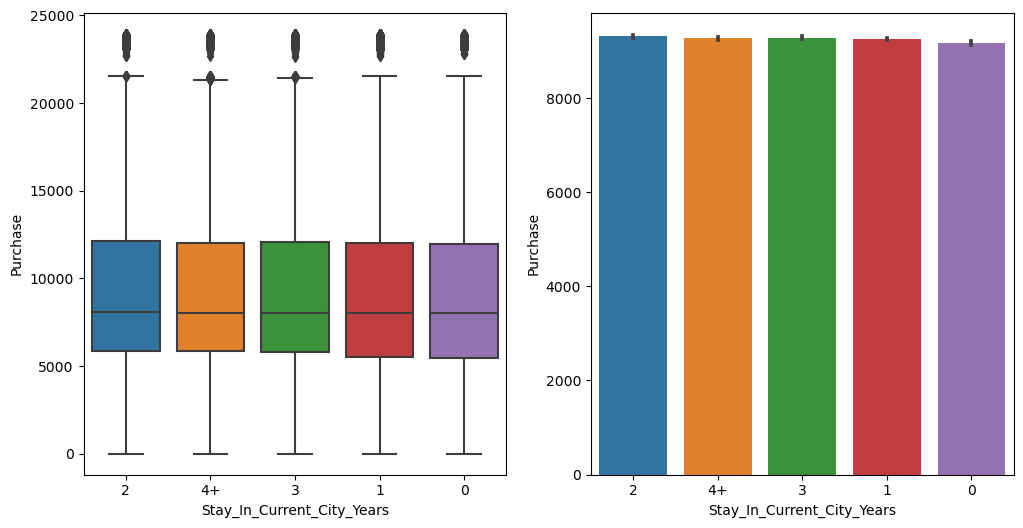

In [114]:
# Purchase Vs Stay in Current City (Years)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Stay_In_Current_City_Years')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'Stay_In_Current_City_Years', y = 'Purchase', estimator='mean')
plt.show()

In [83]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

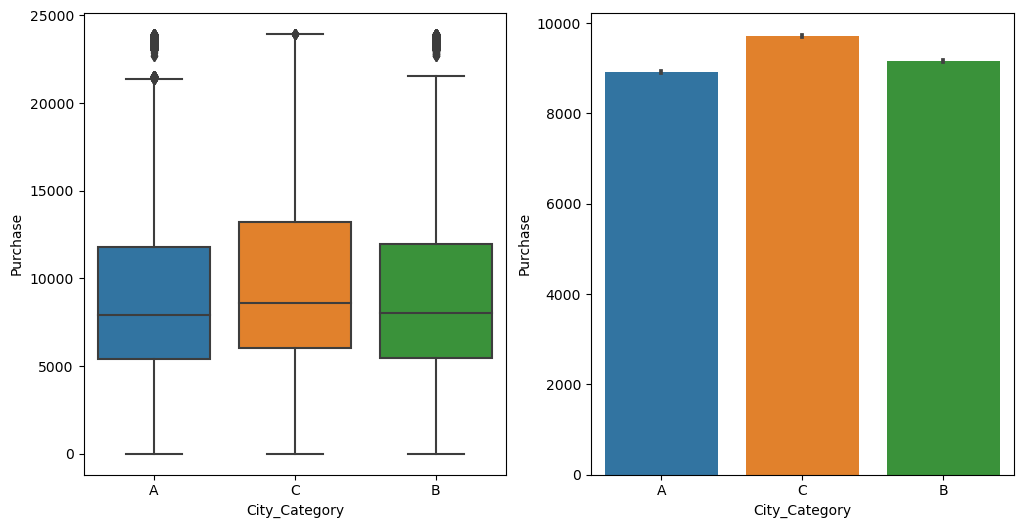

In [116]:
# Purchase Vs City
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'City_Category')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'City_Category', y = 'Purchase', estimator='mean')
plt.show()

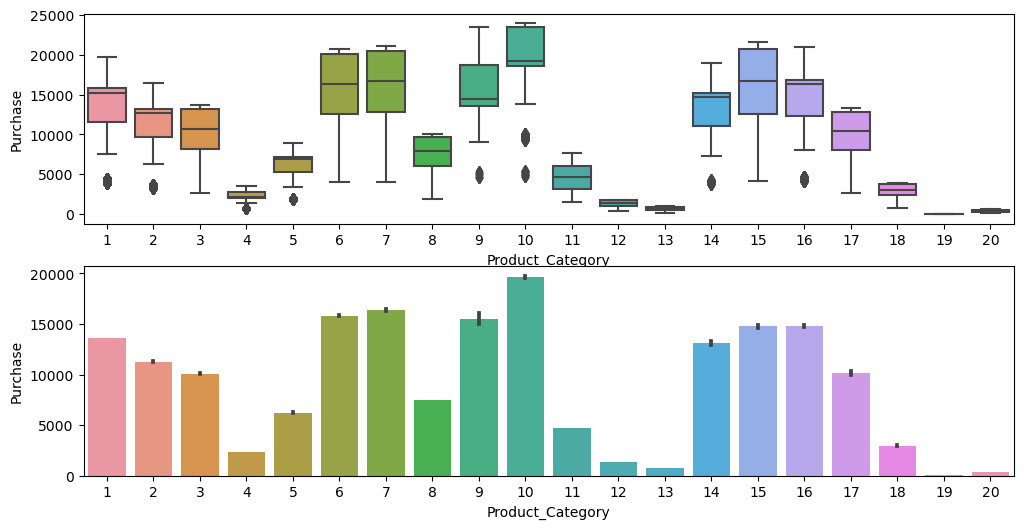

In [117]:
# Purchase Vs Stay in Current City (Years)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Product_Category')
plt.subplot(2,1,2)
sns.barplot(data=df, x = 'Product_Category', y = 'Purchase', estimator='mean')
plt.show()

## Multivariate Analysis

In [88]:
df_transform = df.copy()

In [89]:
df_transform['Gender'] = df_transform['Gender'].replace({'M': 0, 'F': 1})

In [92]:
df_transform['City_Category'] = df_transform['City_Category'].replace({'A': 0, 'B': 1, 'C': 2})
df_transform['Age'] = df_transform['Age'].replace({'0-17': 0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})

In [93]:
df_transform.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4+,0,8,7969


<Axes: >

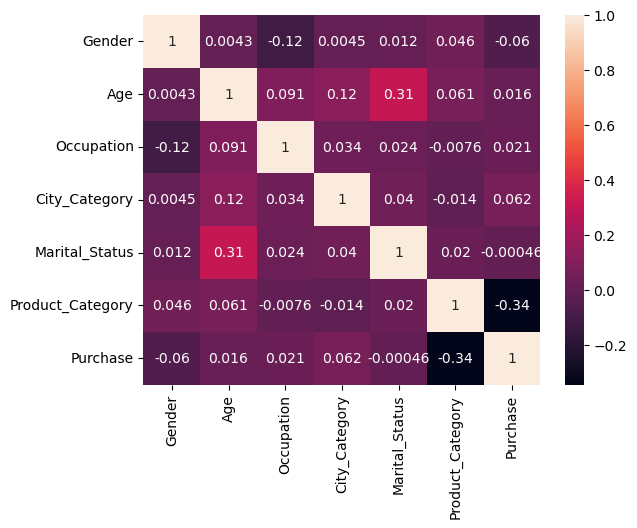

In [97]:
sns.heatmap(df_transform.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1).corr(), annot=True)

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


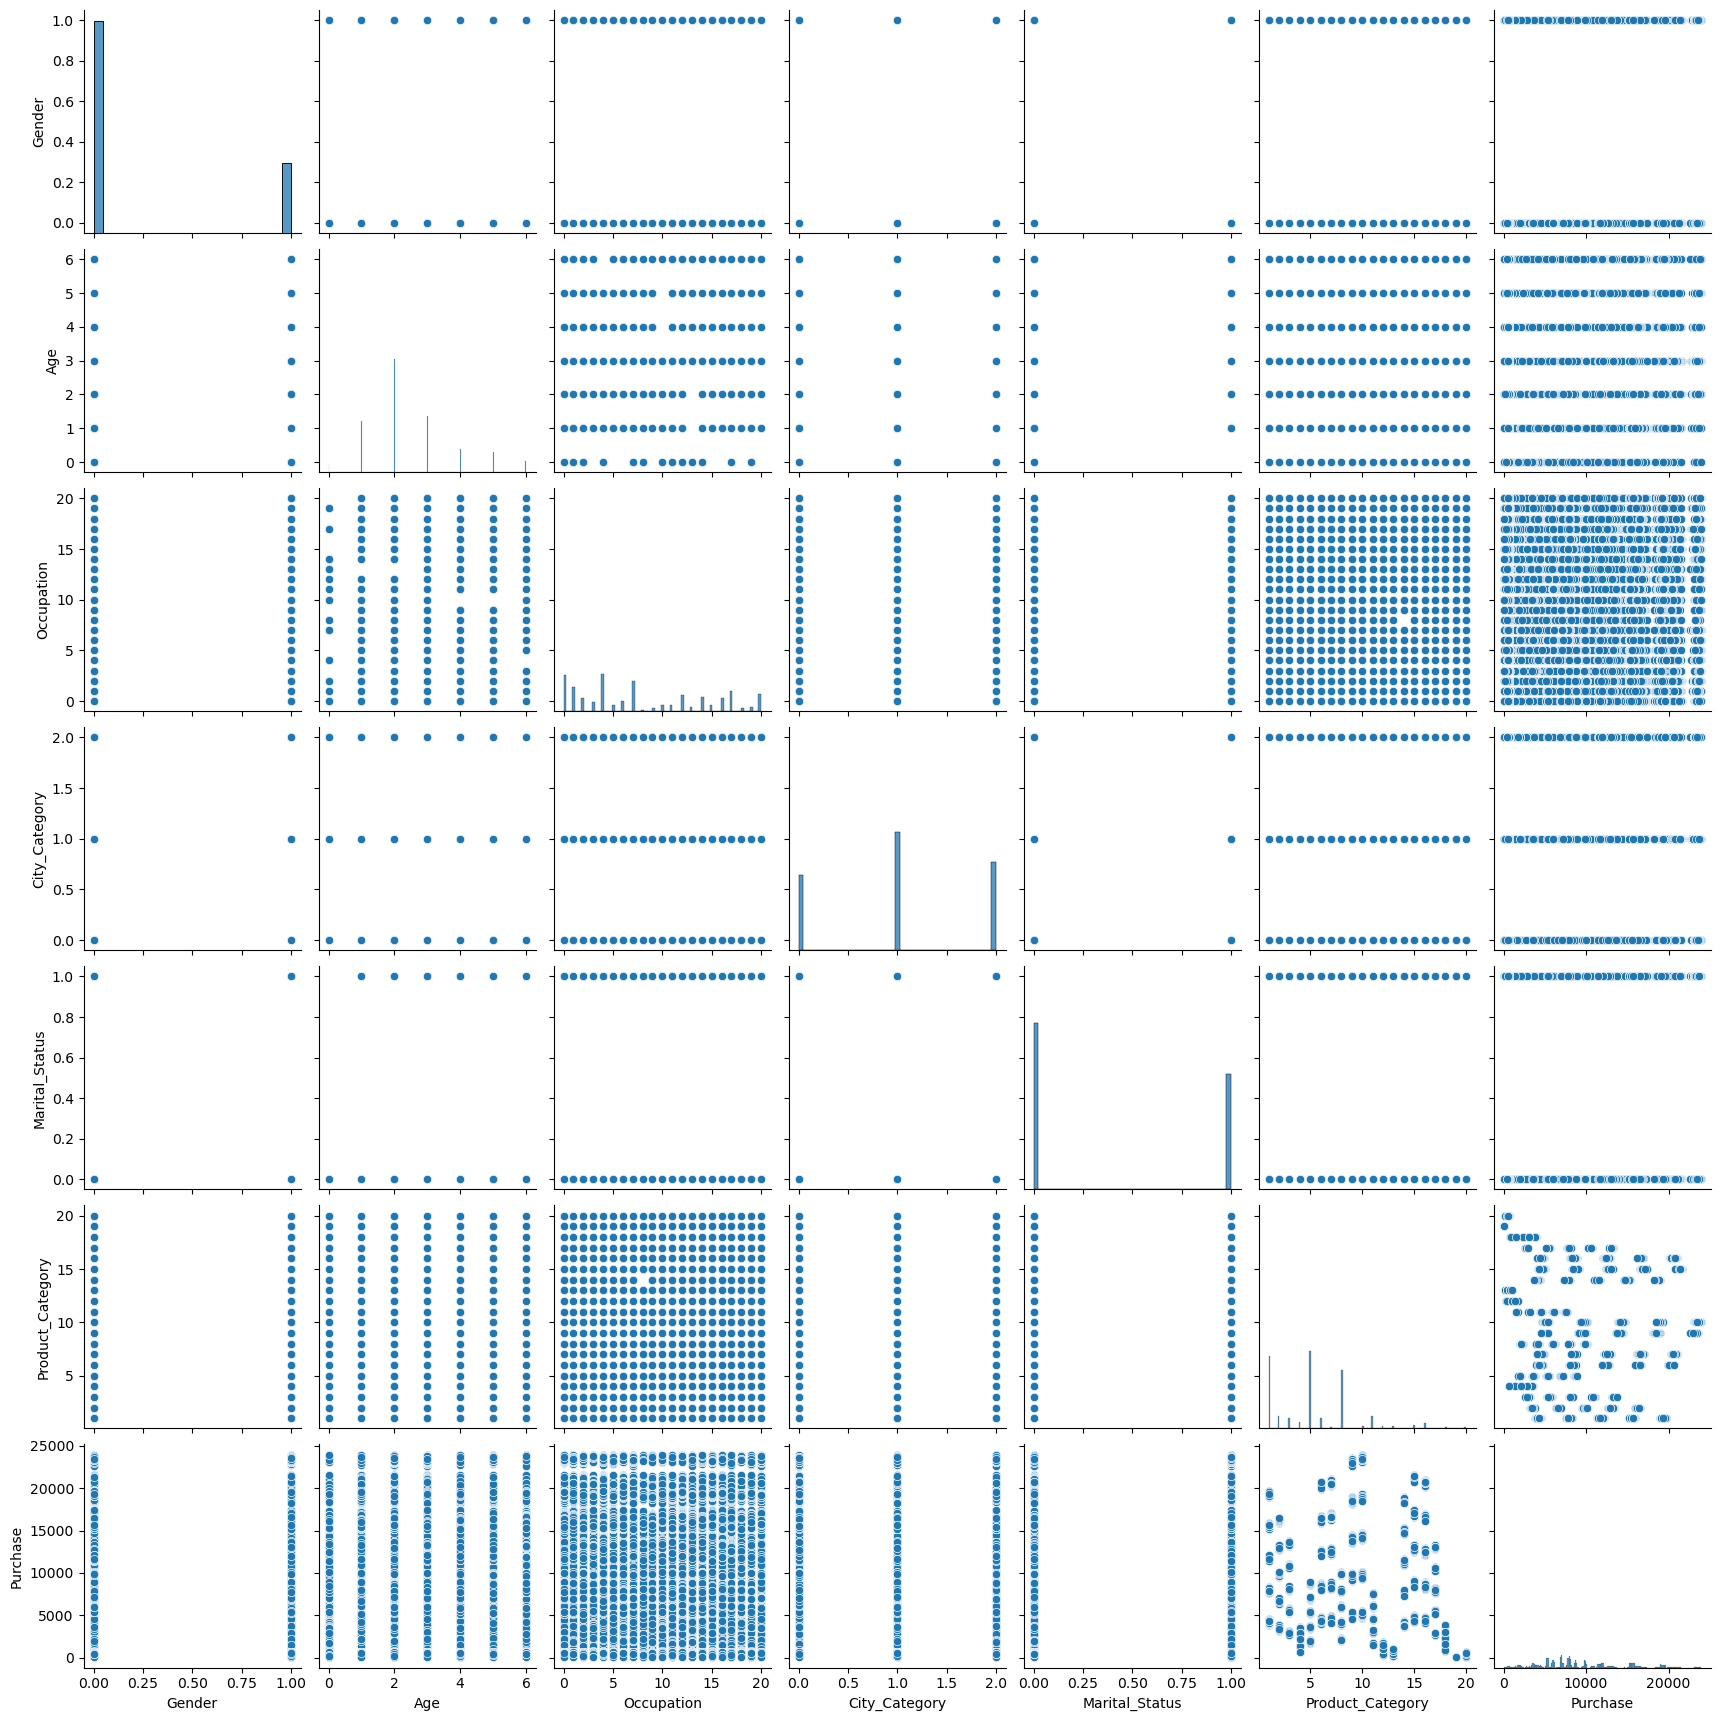

In [98]:
sns.pairplot(df_transform.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1))

# Questions

In [124]:
df_grp = df[['User_ID', 'Gender', 'Purchase']].groupby(['User_ID', 'Gender']).sum().reset_index()
df_m = df_grp[df_grp['Gender'] == 'M']['Purchase']
df_w = df_grp[df_grp['Gender'] != 'M']['Purchase']

In [182]:
df[df['User_ID'] == 1000001].sum()

User_ID                                                                35000035
Product_ID                    P00069042P00248942P00087842P00085442P00085942P...
Gender                                      FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
Age                           0-170-170-170-170-170-170-170-170-170-170-170-...
Occupation                                                                  350
City_Category                               AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Stay_In_Current_City_Years                  22222222222222222222222222222222222
Marital_Status                                                                0
Product_Category                                                            213
Purchase                                                                 334093
dtype: object

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

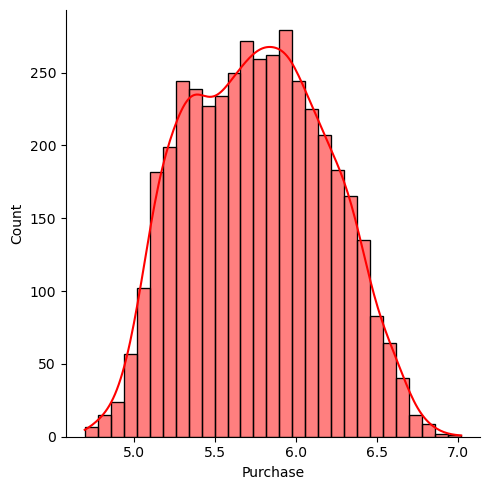

In [144]:
plt.figure(figsize=(12,6))


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


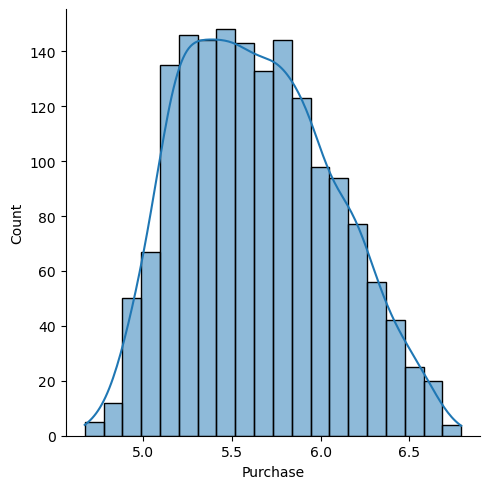

In [150]:
from scipy.stats import norm
from statsmodels.stats import weightstats as stests

## Define Null Hypothesis

- **`H0: u1 <= u2`**
- **`Ha: u1 > u2`**
- `u1: Mean purchase value of Women `
- `u2: Mean purchase value of Men`

## Distribution of samples

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Purchase distribution of Women')

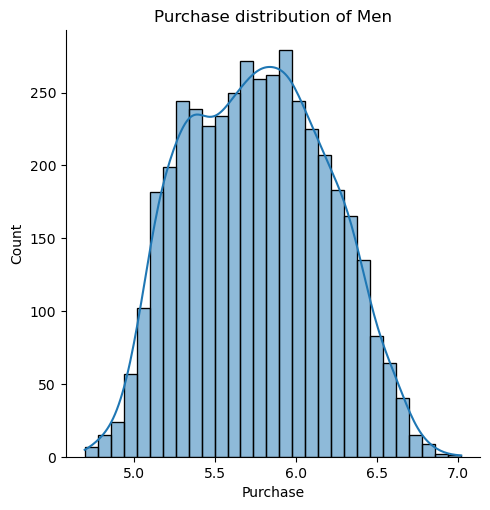

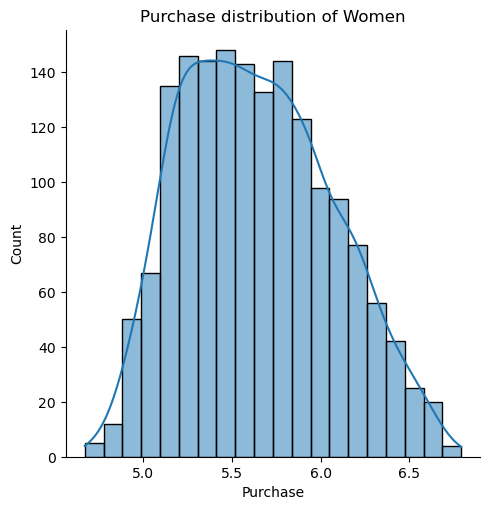

In [157]:
sns.displot(np.log10(df_m), kde=True)
plt.title('Purchase distribution of Men')
sns.displot(np.log10(df_w), kde=True)
plt.title('Purchase distribution of Women')

## Type of Test

**Right Sided Test**

## Compute Zstat and P value

In [151]:
zstat, pval = stests.ztest(df_w, df_m, value=0, alternative='greater')
zstat,pval

(-7.854264073762262, 0.999999999999998)

In [156]:
alpha = 0.05
if pval < alpha:
    print("Reject Null Hypothesis. Hence, Mean purchase value of Women is greater than Men")
else:
    print("Fail to Reject Null Hypothesis. Hence, Mean purchase value of Women is less than or equal to Men")

Fail to Reject Null Hypothesis. Hence, Mean purchase value of Women is less than or equal to Men


In [152]:
df_w.mean(), df_m.mean()

(712024.3949579832, 925344.4023668639)

In [153]:
df[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


# CLT

<Axes: ylabel='Density'>

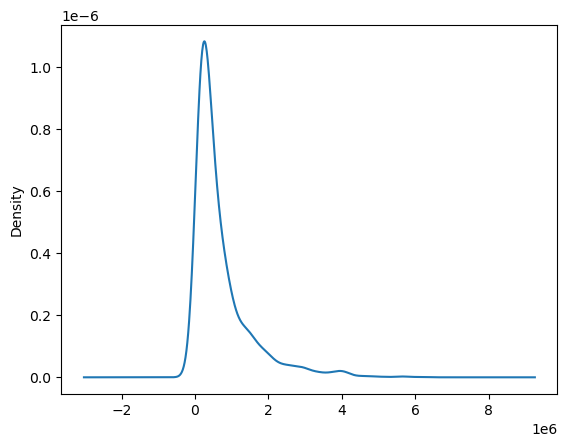

In [158]:
df_w.plot(kind='kde')

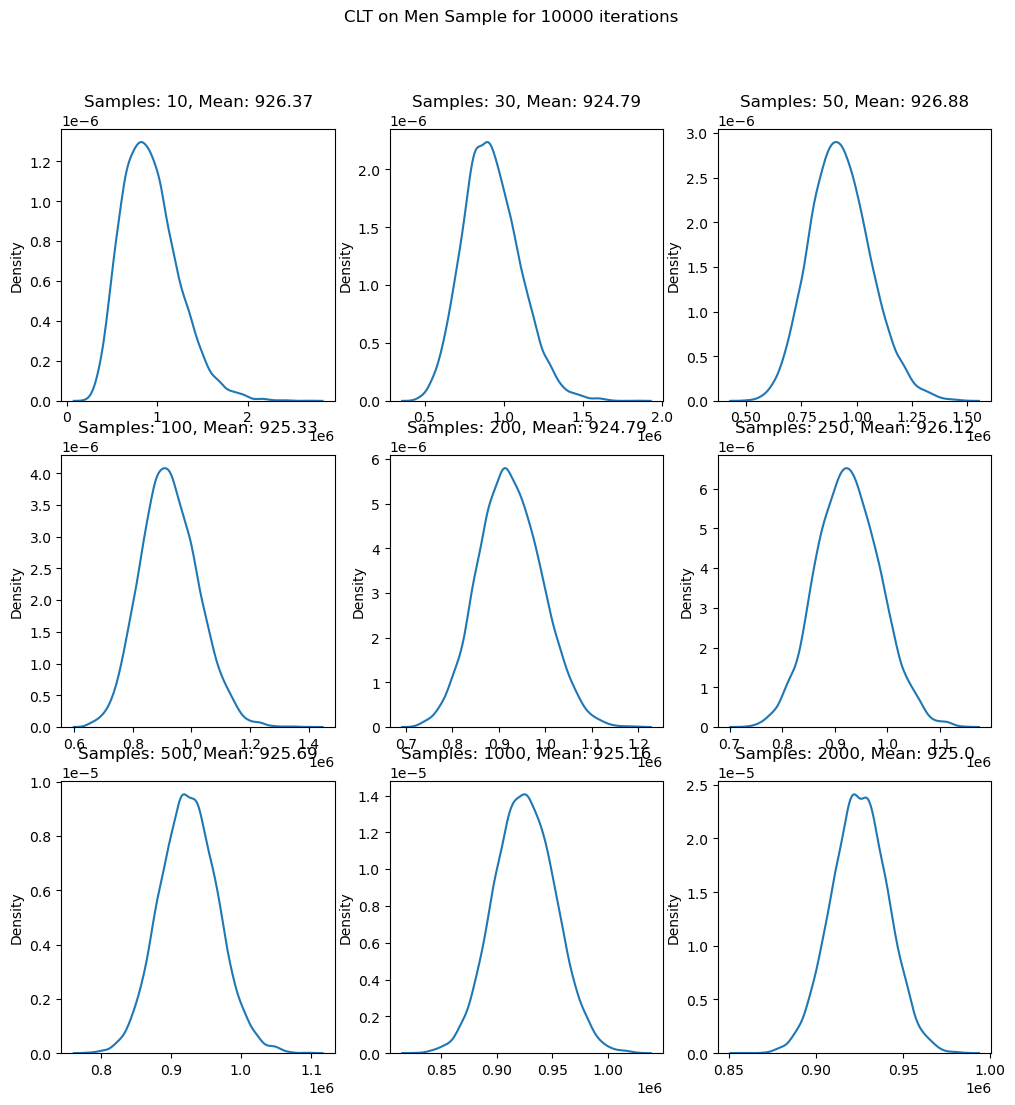

In [170]:
plt.figure(figsize=(12,15)).suptitle('CLT on Men Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_m.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

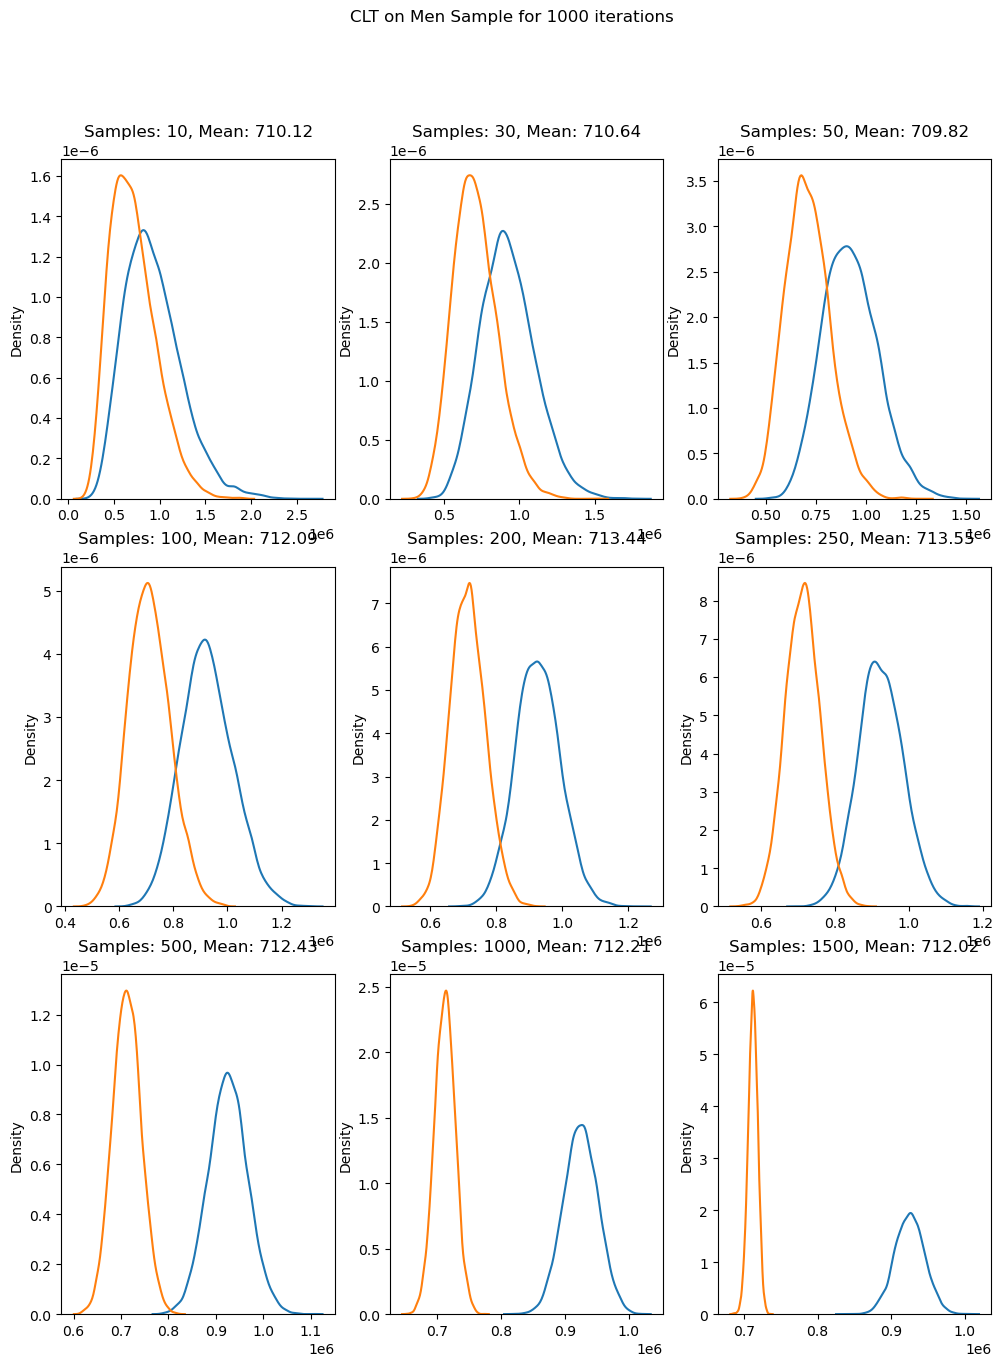

In [173]:
plt.figure(figsize=(12,15)).suptitle('CLT on Men Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 1500]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_m.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

In [ ]:
plt.figure(figsize=(12,16)).suptitle('CLT on Women Sample for 1000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

In [ ]:
plt.figure(figsize=(12,16)).suptitle('CLT on Women Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

# Confidence Interval

In [191]:
n_samp = 1000
n_iter = 10000
f_arr = np.array([df_w.sample(n_samp).mean() for j in range(n_iter)])
f_mean = f_arr.mean()
f_std = df_w.std()/np.sqrt(n_samp)
m_arr = np.array([df_m.sample(n_samp).mean() for j in range(n_iter)])
m_mean = m_arr.mean()
m_std = df_m.std()/np.sqrt(n_samp)

In [192]:
# 90% CI
ci= 0.9
alpha = (1-ci)/2
z = norm.ppf(alpha)

In [193]:
# For Female
f_mean + z * f_std, f_mean, f_mean - z * f_std

(670139.2444384001, 712134.5026007, 754129.7607629999)

In [194]:
# For Male
m_mean + z * m_std, m_mean, m_mean - z * m_std

(874150.5760537082, 925428.3698185001, 976706.163583292)

In [179]:
f_std

807370.7261464577

In [183]:
f_mean

712024.3949579832